# Project Business Statistics: E-news Express

**Marks: 60**

## Context

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

## Objective
Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

1. Explore the dataset and extract insights using Exploratory Data Analysis.

2. Do the users spend more time on the new landing page than the existing landing page?

3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

5. Is the time spent on the new page same for the different language users?


*Consider a significance level of 0.05 for all tests.

The  idea  behind  answering  these  questions  is  to  decide  whether  the  new  page  is  effective  enough  to  gather  new subscribers for the news portal. We will perform the statistical analysis on the collected data to make the business decision.


## Data Dictionary

1. user_id - This represents the user ID of the person visiting the website.

2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).

3. landing_page - This represents whether the landing page is new or old.

4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.

6. language_preferred - This represents the language chosen by the user to view the landing page.

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

## Import all the necessary libraries

In [2]:
# import the important packages
import numpy as np # library used for working with arrays
import pandas as pd # library used for data manipulation and analysis
from matplotlib import pyplot as plt  # library for plots and visualizations
import seaborn as sns # library for visualizations
import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [3]:
## Reading a dataset from a csv file using pandas.
df = pd.read_csv('abtest.csv')



In [4]:
# looking at head (5 observations)
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observations:

* The DataFrame contains 6 columns.
* Data in each row corresponds to the user id of the person visiting the website.
* Group column contains the information about the user group (control) or (treatment).
* Landing page column represents whether the landing page is new or old.
* Time spent on the page column represents the time (in minutes) spent by the user on the landing page.
* Converted column represents whether the user gets converted to a subscriber of the news portal or not.
* Language preferred column represents the language chosen by the user to view the landing page.

In [5]:
# looking at tail (5 observations) 
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
#df.shape returns the number of rows and columns of the dataframe
df.shape

(100, 6)

#### Observations: 
*  The dataset has 100 rows and 6 columns.

In [7]:
#function isnull()is used to check the missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations: 
*  The dataset does not contain any missing values.

In [8]:
# info() is used to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations: 
* The datatypes of the different columns in the dataset are int(1 no), float(1 no), object(4 nos).
* user_id ,time_spent_on_the_page are numerical.
* group, landing page, converted and language prefered are categorial.

In [9]:
# Fixing the data types
#df.astype() function convert the data type of an existing column in a dataframe
# converts group from object to category
df.group = df.group.astype('category')

# Converts landing_page from object to category
df.landing_page = df.landing_page.astype('category')

# Convert "converted" from object to category
df.converted = df.converted.astype('category')  

# Convert language_preferred from object to category
df.language_preferred = df.language_preferred.astype('category') 

# df.info()function returns  information about the dataframe including the data types of each column and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observations:
* Converting 'group', 'landing_page', 'converted' 'language_preferred' from object type attributes to  'category' type results in reduced memory usage. 
* Memory usage reduced from 4.8+ KB to 2.6 KB.

In [10]:
#df.describe function returns the statistical data like percentile, mean, etc of the datafram
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Observations:
* Minimum time spent on the page is 19 sec.
* Average time spent on the page is 5 minutes.
* Maximum time spent on the page is 11 minutes.
* Mean and median time_spent_on_the_page are almost equal.So negligible skewness.




In [11]:
# Check for missing values in group
#The df.value_counts( )returns a Series containing the counts of unique values
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

#### Observations:
* There are 2 groups. Control and Treatment. There are 50 users in each group, so no missing values.


In [12]:
# Check for missing values in landing_page
#The df.value_counts( )returns a Series containing the counts of unique values
df['landing_page'].value_counts()

new    50
old    50
Name: landing_page, dtype: int64

#### Observations:
* There are 2 landing pages. New and Old. 
* No missing values.

In [13]:
# Check for missing values in converted
#The df.value_counts( )returns a Series containing the counts of unique values
df['converted'].value_counts()  

yes    54
no     46
Name: converted, dtype: int64

#### Observations:
* 54 users get converted to a subscriber of the news portal. 46  users didn't get converted to a subscriber of the news portal.
* No missing values.

In [14]:
# Check for missing values in language_preferred
#The df.value_counts( )returns a Series containing the counts of unique values
df['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

#### Observations:
* 3 unique languages are chosen by the users (French-34, Spanish-34, English-32).
* No missing values.


### Univariate Analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

### Observations on Time spent on the page

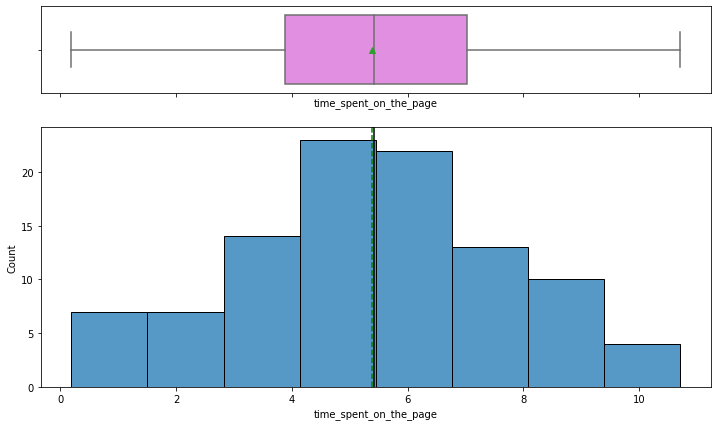

In [17]:

# histogram for time_spent_on_the_page.
#the data is numeric 
#no outliers
histogram_boxplot(df, 'time_spent_on_the_page')

#### Observations:
* Mean and median are very close. Its around 5 minute.
* time_spent_on_the_page does not have any outliers.

### Observations on Time spent on the old landing page

In [18]:
df_old=df[df["landing_page"]=="old"]

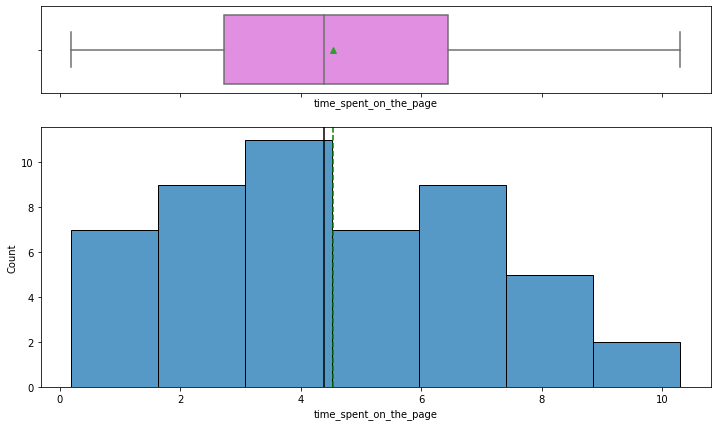

In [19]:
# histogram for time spent on old landing page
histogram_boxplot(df_old,'time_spent_on_the_page')

### Observations on Time spent on the new landing page

In [20]:
df_new=df[df["landing_page"]=="new"]

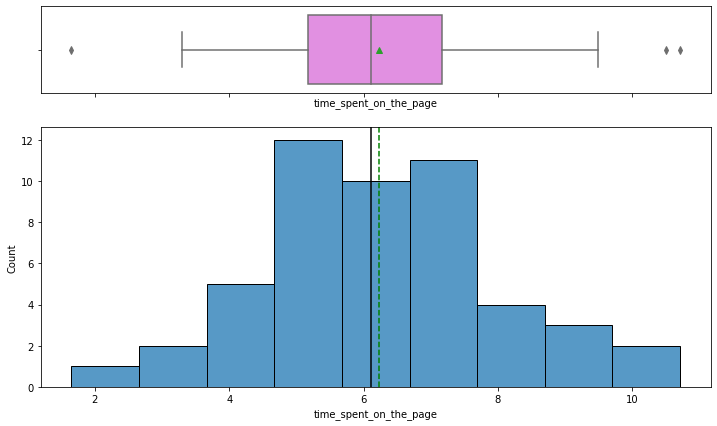

In [21]:
# histogram for time spent on new landing page.
histogram_boxplot(df_new,'time_spent_on_the_page')

### Comparison on new landing page vs old landing page.

#### Observations:
* Time spend on new landing page follows more normal distribution than time spent on old landing page.
* Average time spent on the new landing page is higher than old landing page.
* Data of the Time spent on the new landing page follow normal distribution.

### Observations on group

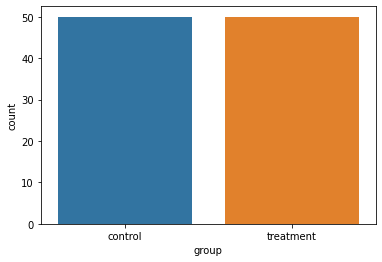

In [22]:

sns.countplot(data=df,x='group');

#### Observations:
* There are 2 groups. 
* Control and Treatment. 
* There are equal number of  users in each groups.


### Observations on landing page

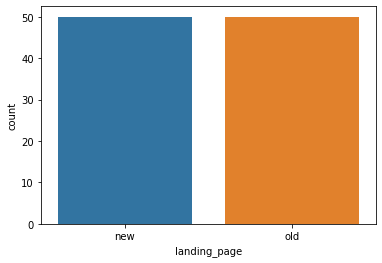

In [23]:
## countplot for landing page
sns.countplot(data = df, x ='landing_page');

#### Observations:
* There are 2 landing pages. New and Old. 
* No missing values.

### Observations on converted users

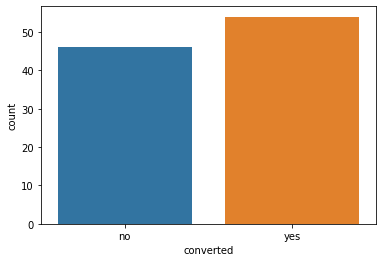

In [24]:
#countplot for converted
sns.countplot(data = df, x ='converted');

#### Observations:
* Number of  users get converted to a subscriber of the news portal is more.

### Observations on language preference of users

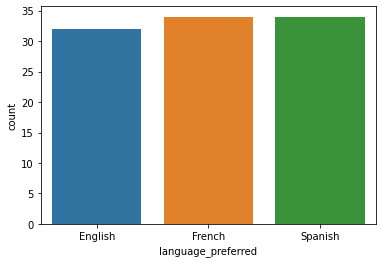

In [25]:
#countplot for language prefered
sns.countplot(data = df, x ='language_preferred');

#### Observations:
* Most prefered languages of users are French and Spanish.
* Number of users that prefer English, French and Spanish are very close.

### Bivariate Analysis

### Observations on Conversion rate : (Landing page vs Converted) 


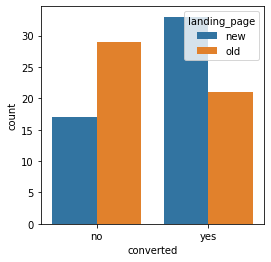

In [26]:
## countplot for converted vs landing page
plt.figure(figsize=(4, 4))

sns.countplot(data = df, x ='converted',hue="landing_page");
plt.show()

#### Observations:
* Conversion rate is higher for new landing page than old landing page.

### Observation on conversion rate, preferred language and landing pages 

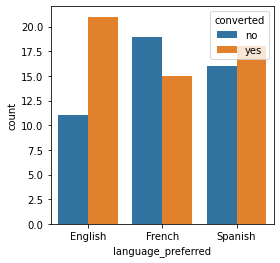

In [27]:
#countplot for language prefered vs converted
plt.figure(figsize=(4, 4))

sns.countplot(data = df.sort_values('language_preferred'), x ='language_preferred',hue= "converted");
plt.show()

#### Observations:
* Number of users that prefer English, French and Spanish are very close.

### Observation on conversion rate-old landing page, preferred language and landing pages 

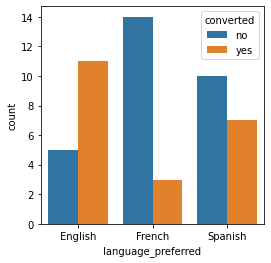

In [28]:
#countplot for language prefered (old) vs converted
plt.figure(figsize=(4, 4))

sns.countplot(data = df_old.sort_values('language_preferred'), x ='language_preferred',hue= "converted");
plt.show()

### Observation on conversion rate-new landing page, preferred language and landing pages

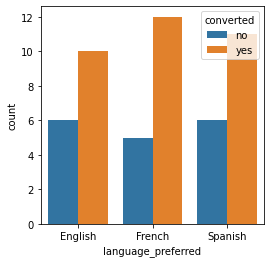

In [29]:
## countplot for language prefered (new) vs converted
plt.figure(figsize=(4, 4))

sns.countplot(data = df_new.sort_values('language_preferred'), x ='language_preferred',hue= "converted");
plt.show()

#### Observations : Comparison of the above two graphs
* Change in conversion for new landing page vs old landing page is less for English. 
* Conversion for new landing page vs old is more for French.
* Conversion for new landing page vs old is more for Spanish.
* There is more French users in conversion on the new landing page.

### Observation on language_prefered vs landing_page vs time spent on the landing page

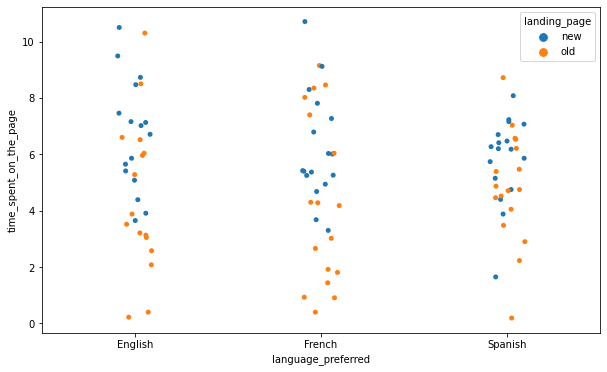

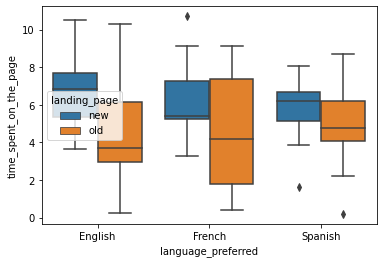

Avg time spent on the new landing page by preferred language:
language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


In [30]:
# stripplot and box plot

fig,ax = plt.subplots(figsize=(10,6
                              ))
sns.stripplot(data = df.sort_values('language_preferred'), x ='language_preferred',y="time_spent_on_the_page",hue= "landing_page");
plt.show()
sns.boxplot(data = df.sort_values('language_preferred'), x ='language_preferred',y="time_spent_on_the_page",hue= "landing_page");
plt.show()
print("Avg time spent on the new landing page by preferred language:")
print(df_new.groupby("language_preferred").mean()["time_spent_on_the_page"])

#### Observations on  language_prefered vs landing_page vs time spent on the landing page
* Irrespective of language, the  mean time spent on the new landing page is more than old landing page for all users.
* Avg time spent on the new landing page by preferred language: English(6.6 min), French (6.19min), Spanish (5.83min).


### Observation on time spent on the page vs landing page 

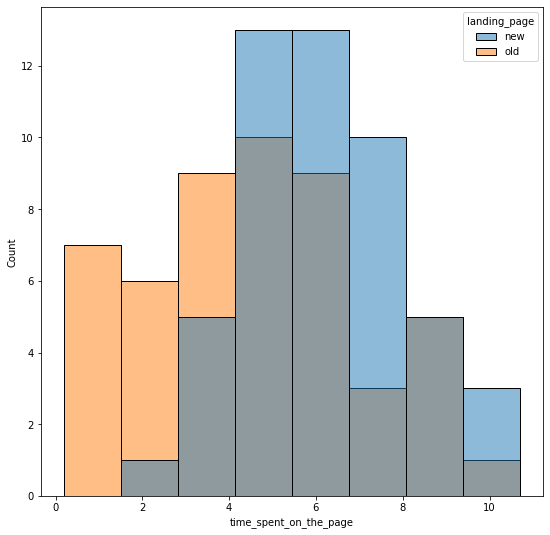

In [31]:
#histplot
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'landing_page')
plt.show()

#### Observations: 
* Data for time spent on the new landing page appears to follow a normal distribution.
* Average time spent on the new landing page is higher than on the old landing page.

### Observations on Time spent on the page vs Different group users 



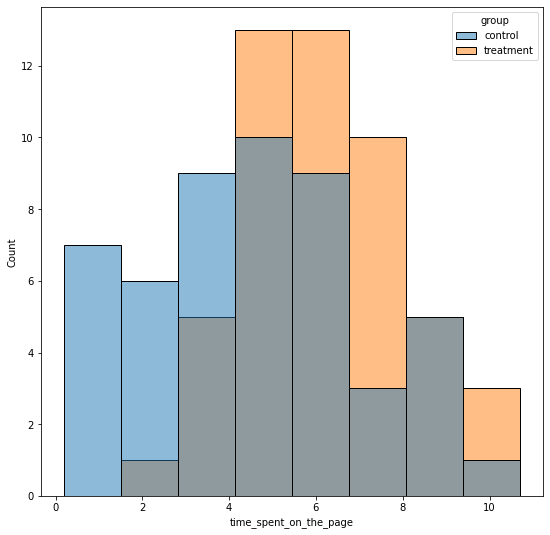

In [32]:
#histplot
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'group')
plt.show()

#### Observations: 
* This graph represents 2 type of groups, control and treatment.

### Observations on Time spent on the page vs Converted users 

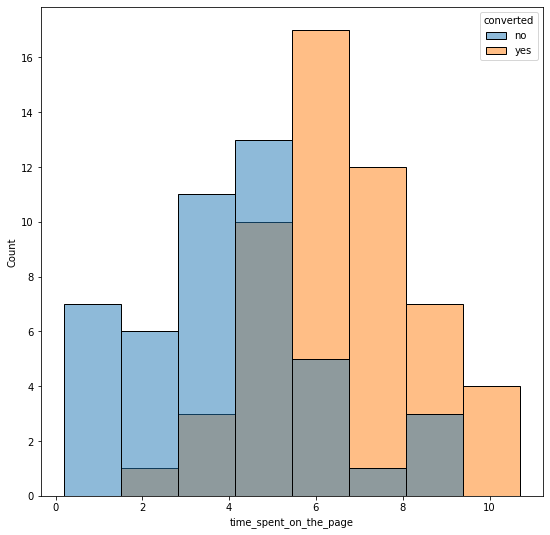

In [33]:
# histplot
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'converted')
plt.show()

#### Observations: 
* There graph represents whether the user gets converted to a subscriber of the news portal or not.

### Observations on Time spent on the page vs Language chosen by users 


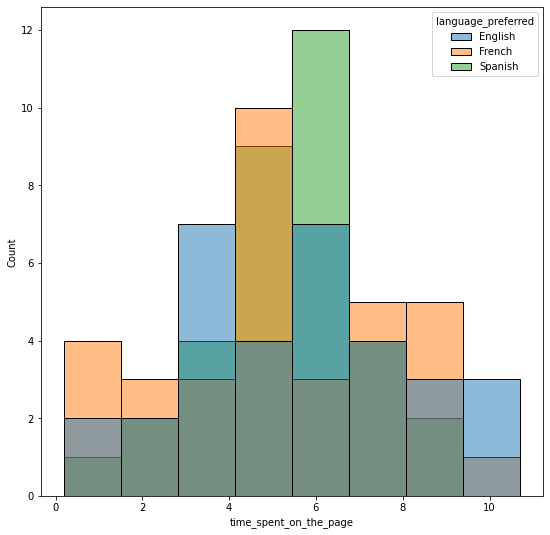

In [34]:
#histplot
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'language_preferred')
plt.show()

#### Observations: 
* Prefered users are French, Spanish and English.

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

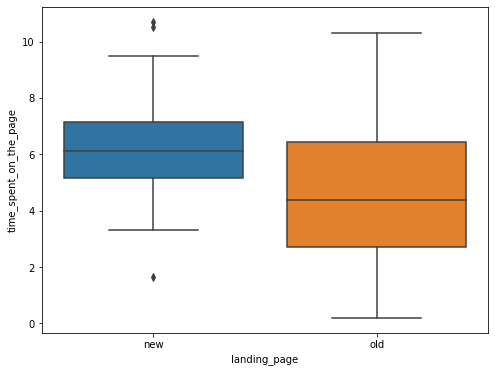

In [35]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()


### Step 1: Define the null and alternate hypotheses

**Null Hypothesis: H0:** The mean time spent by user on the new landing page is same as the mean time spent on old landing page.

**Alternate hypothesis: Ha:** The mean time spent by user on the new landing page is higher than the  mean time spent on old landing page.

Let µ1 and µ2 be the mean time spent by user on the new and old landing pages respectively.

We will test the null hypothesis

**H0: µ1=µ2**

against the alternate hypothesis

**Ha: µ1>µ2**

### Step 2: Select Appropriate test

#### Observations:

* Continuous data -  Yes, the time spent is measured on continuous scale.
* Normally distributed populations - Yes, randomly selected samples with sample sizes of 50(it is greeater than 30),normal distribution assumption holds.
* Independent populations - As we are taking random samples for two different type of users, the two samples are from two independent populations.
* Population standard deviations are  unknown.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

**Based on this information, we will using 2 Sample (Independent)  test for comparing means(unknown  Var):T-Test**.

### Step 3: Decide the significance level

Its given in the problem statement, so select α = 0.05.

### Step 4: Collect and prepare data

In [36]:
µ1=df_new["time_spent_on_the_page"].mean()
print('The mean time spent on the new page is: ',round(µ1,2))
µ2=df_old["time_spent_on_the_page"].mean()
print('The mean time spent on the old page is: ',round(µ2,2))
std1=df_new["time_spent_on_the_page"].std()
print('The standard deviation of the time spent on the new page is: ',round(std1,2))
std2=df_old["time_spent_on_the_page"].std()
print('The standard deviation of the time spent on the old page is: ',round(std2,2))

The mean time spent on the new page is:  6.22
The mean time spent on the old page is:  4.53
The standard deviation of the time spent on the new page is:  1.82
The standard deviation of the time spent on the old page is:  2.58


#### Observations:
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.




### Insight:
**Based on all this informations, we can confirm two independent sample T-test for equality of means-Unequal std deviations for this problem.**


### Step 5: Calculate the p-value

In [37]:
#import the required functions
from scipy.stats import ttest_ind

# find the p_value
test_stat, p_value = ttest_ind(df_new["time_spent_on_the_page"],df_old["time_spent_on_the_page"], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


#### Observations:
Calculated P-value is 0.0001.

### Step 6: Compare the p-value with $\alpha$

#### Observations:
As the p-value (~ 0.00014) is much less than the level of significance(.05), the null hypothesis can be rejected. 

### Step 7:  Draw inference

### Insight:
**Thus, it may be concluded that there is enough statistical evidence to conclude that mean time spent by user on the new landing page is higher than the  mean time spent on old landing page.**

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Perform Visual Analysis

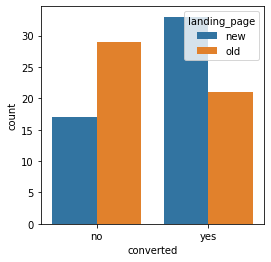

In [38]:
plt.figure(figsize=(4, 4))

sns.countplot(data = df, x ='converted',hue="landing_page");
plt.show()

#### Observations:
* Conversion rate is higher for new landing page than old landing page.

### Step 1: Define the null and alternate hypotheses

**Null Hypothesis: H0:** The conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page

**Alternate hypothesis: Ha:** The conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page

Let p1 and p2 be the conversion rate for the new page and the old page respectively.

We will test the null hypothesis

**H0: p1=p2**

against the alternate hypothesis

**Ha: p1>p2**

### Step 2: Select Appropriate test

#### Observations:
* Binomally distributed population - Yes, converted column represents whether the user gets converted to a subscriber (yes) or not.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

* Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.



**Based on this information, we can use proportion Z -test**.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [39]:
new_converted = float(df_new[df["converted"]=="yes"].count()["group"])
p1 = float(round(new_converted/50, 2))
old_converted = float(df_old[df["converted"]=="yes"].count()["group"])
p2 = float(round(old_converted/50, 2))

print("The conversion rates for new landing page  is:", p1 )

The conversion rates for new landing page  is: 0.66


#### Observations: 
* Conversion rate of new landing page is 0.66.

In [40]:
new_converted = float(df_new[df["converted"]=="yes"].count()["group"])
p1 = float(round(new_converted/50, 2))
old_converted = float(df_old[df["converted"]=="yes"].count()["group"])
p2 = float(round(old_converted/50, 2))
print("The conversion rates for new landing page  is:", p2 )

The conversion rates for new landing page  is: 0.42


#### Observations:
* Conversion rate of old landing page is 0.42.


### Step 5: Calculate the p-value

In [41]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
stat, p_value = proportions_ztest([new_converted,old_converted],[50,50],alternative = 'larger')  

print('The p-value is'+ str(p_value))

The p-value is0.008026308204056278


### Step 6: Compare the p-value with  𝛼

 

#### Observations:
* As the p-value (~ 0.008) is much less than the level of significance(0.05), the null hypothesis can be rejected. 

### Step 7:  Draw inference
### Insight:
**Since the p-value (~0.008) is less than the level of significance, we can reject the null hypothesis. We do have enough evidence to support the claim that the conversion rate for the new landing page greater than the conversion rate for the old page.**

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Perform Visual Analysis

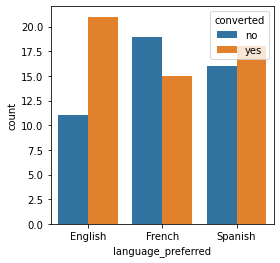

In [42]:
plt.figure(figsize=(4, 4))

sns.countplot(data = df.sort_values('language_preferred'), x ='language_preferred',hue= "converted");
plt.show()

### Step 1: Define the null and alternate hypotheses

**Null Hypothesis: H0:** Converted status is independent of the preferred language.

**Alternate hypothesis: Ha:** Alternate Hypothesis - Converted status is dependent on the preferred language.


### Step 2: Select Appropriate test

#### Observations:
* Variables are categorical.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

**Based on this information, we can use Chi-Square Test for Independence**.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [43]:

language_converted = pd.crosstab(df.converted,df.language_preferred).rename_axis(None,axis=1)
language_converted


,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


#### Observations:
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Step 5: Calculate the p-value

In [44]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(language_converted)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


#### Observations:
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Step 6: Compare the p-value with  𝛼

#### Observations:
* As the p-value (~ 0.21) is much more than the level of significance(0.05), the null hypothesis cannot be rejected. 

### Step 7:  Draw inference
### Insight:
**Since the p-value (~0.021) is more than the level of significance, we cannot reject the null hypothesis. We do not have enough evidence to support the claim that the conversion rate conversion rate is dependent on the preferred language.**

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Perform Visual Analysis

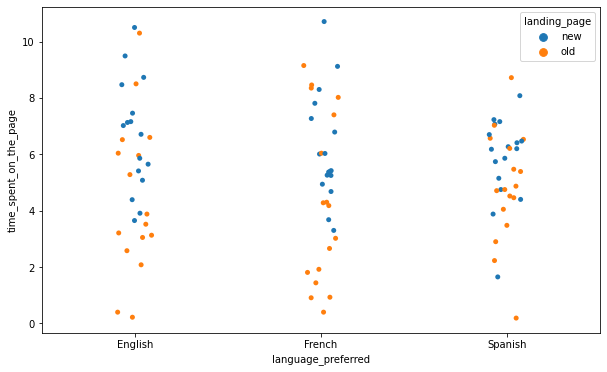

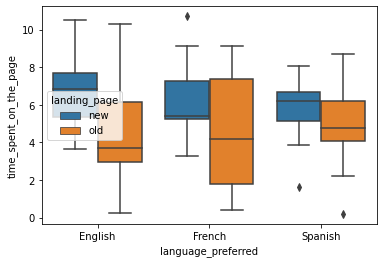

In [45]:
#  code to visually plot the time spent on the new page for different language users
fig,ax = plt.subplots(figsize=(10,6
                              ))
sns.stripplot(data = df.sort_values('language_preferred'), x ='language_preferred',y="time_spent_on_the_page",hue= "landing_page");
plt.show()
sns.boxplot(data = df.sort_values('language_preferred'), x ='language_preferred',y="time_spent_on_the_page",hue= "landing_page");
plt.show()

#### Observations:
* Irrespective of language, the  mean time spent on the new landing page is more than old landing page for all users.

### Mean time spent on the new page for different language users

In [46]:
#code to calculate the mean time spent on the new page for different language users
print(df_new.groupby("language_preferred").mean()["time_spent_on_the_page"])

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


#### Observations:
* Irrespective of language, the  mean time spent on the new landing page is more than old landing page for all users.
* Avg time spent on the new landing page by preferred language: English(6.6 min), French (6.19min), Spanish (5.83min).


### Define the null and alternate hypotheses

**Null Hypothesis: H0:** The mean time spent on new page by user on different languages are same.

**Alternate hypothesis: Ha:** The mean time spent on new page by user on one of the different languages are different.

Let µ1, µ2 and µ3 be the mean time spent by user on different languages respectively.

We will test the null hypothesis

**H0: µ1 = µ2 = µ3**

against the alternate hypothesis

**Ha: one of µ1,µ2,µ3 is different**



###  Select Appropriate test

#### Observations:

Now, the normality and equality of variance assumptions need to be checked.
* For testing normality, Shapiro-Wilki's test is applied to response variable.
* For equality of variance, Levene test is applied to the response variable.


### Shapiro-Wilk’s test
### Step 1: Define the null and alternate hypotheses

**Null Hypothesis: H0:** Time spent on the new landing page follows normal distribution.

**Alternate hypothesis: Ha:** Time spent on the new landing page doen't follow a normal distribution.


### Step2: Decide the significance level

Its given in the problem statement, so select α = 0.05.

### Step 3: Calculate the p-value

In [47]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


#### Observation:

* P - value is ~0.8.

### Step 4: Compare the p-value with  𝛼

#### Observation:

* P - value (~0.8)  is larger than level of significance (.05), hence we fail to reject the null hypothesis.



### Step 5:  Draw inference
### Insight:
**Since the p-value is higher than the level of significance, we cannot reject the null hypothesis that the response follows the normal distribution.**

### Levene’s test


### Step 1: Define the null and alternate hypotheses

**Null Hypothesis: H0:** All the population variances are equal

**Alternate hypothesis: Ha:** At least one variance is different from the rest.

### Step 2: Select Appropriate test

#### Observations:
* To check that variances are equal for all samples when your data comes from a non normal distribution.

### Step3: Decide the significance level

Its given in the problem statement, so select α = 0.05.

### Step 4: Calculate the p-value

In [48]:
# create subsetted data frame for new time spent
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
# create subsetted data frame for old time spent
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [49]:


#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_new["time_spent_on_the_page"][df_new['language_preferred']=="Spanish"], 
                                   df_new["time_spent_on_the_page"][df_new['language_preferred']=="English"], 
                                 df_new["time_spent_on_the_page"][df_new['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


### Step 5: Compare the p-value with $\alpha$

#### Observations:
P - value (~.47) is more than significance level, we fail to reject the null hypothesis of homogenity of variance.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.




### Step 1: Define the null and alternate hypotheses

**Null Hypothesis: H0:** All the population variances are equal

**Alternate hypothesis: Ha:** At least one variance is different from the rest.

### Step 2: Select Appropriate test

#### Observations:
* To analyse the variance we use One-way ANOVA Test.

### Step 3: Decide the significance level

Its given in the problem statement, so select α = 0.05.

### Step 4: Collect and prepare data

In [52]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French =   df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish =    df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']





### Step 5: Calculate the p-value

In [51]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df_new.loc[df_new['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

#### Observations:
* As the p-value (~ 0.43) is much more than the level of significance(.05), the null hypothesis can be accepted. 


### Step 7:  Draw inference
### Insight:
**Since the p-value (~ 0.43) is much more than the level of significance(.05), so we fail to reject the null hypothesis.  We do not  have enough evidence to conclude that atleast one mean time spent on the new page same for the different language users is different from significance level.**

## Conclusion and Business Recommendations

## Conclusion
 
We analyzed a dataset of 100 person visiting the website. Data contains information about user in group (control) & group (treatment).It also contain information about old and new landing page, time spent by user on pages, language prefered by users, is the user converted or not.


* The main feature of interest here is average time spent on the new landing page is higher than on the old landing page.


* Irrespective of language, the  mean time spent on the new landing page is more than old landing page for all users.


* Avg time spent on the new landing page by preferred language: English(6.6 min), French (6.19min), Spanish (5.83min).

* Conversion on the new landing page is more among French users  and  less for users prefering English.

## Statistical Analysis

* By using two independent sample T-test for equality of means-Unequal std deviations, it may be concluded that there is enough statistical evidence to conclude that mean time spent by user on the new landing page is higher than the mean time spent on old landing page.


* By using proportion -Ztest, we do have enough evidence to support the claim that the conversion rate for the new landing page greater than the conversion rate for the old page.


* By using Chi-Square Test for Independence, we do not have enough evidence to support the claim that the conversion rate conversion rate is dependent on the preferred language.


* By using One-way ANOVA Test, we do not have enough evidence to conclude that atleast one mean time spent on the new page same for the different language users is different from significance level.


## Recommendation to business
 
*  New landing page is better in time spent by users on the page.

*  New landing page is better in conversion rate.

* So new landing page is better.

* EDA shows that French and Spanish users had a higher conversion rate on new landing page. 


 
##  Further Analysis
 
 * We do not have enough evidence to prove that at least one mean time spent on the new landing page for diferrent preferred languages is different from the rest. So we need more data to do further investigation.
 


